In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import ipywidgets as widget
%matplotlib inline

In [10]:
conn = sqlite3.connect('./data/database.db')

In [11]:

conn.cursor()
options = conn.execute('SELECT issue.name, issue.id FROM issue WHERE issue.data_set_id = 2')


option_list = dict(options.fetchall())
option_list

{}

In [12]:
dropdown = widget.Dropdown(
    options=option_list,
    description='Select issue to analyze:',
    disabled=False
)

dropdown

<p>Failed to display Jupyter Widget of type <code>Dropdown</code>.</p>
<p>
  If you're reading this message in the Jupyter Notebook or JupyterLab Notebook, it may mean
  that the widgets JavaScript is still loading. If this message persists, it
  likely means that the widgets JavaScript library is either not installed or
  not enabled. See the <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">Jupyter
  Widgets Documentation</a> for setup instructions.
</p>
<p>
  If you're reading this message in another frontend (for example, a static
  rendering on GitHub or <a href="https://nbviewer.jupyter.org/">NBViewer</a>),
  it may mean that your frontend doesn't currently support widgets.
</p>

In [13]:
df = pd.read_sql("SELECT ai.position, a.name as actor, i.name as issue, it.number "
                 "FROM actorissue AS ai "
                 "LEFT JOIN actor a ON a.id = ai.actor_id "
                 "LEFT JOIN issue i ON i.id = ai.issue_id "
                 "LEFT JOIN iteration it ON it.id = ai.iteration_id LEFT JOIN repetition r on r.id = it.repetition_id "
                 "WHERE ai.type = 'before' AND r.number=2 AND i.id=? ORDER BY i.name, it.number, a.name", 
                 conn, 
                 index_col='actor', 
                 params=[dropdown.value],
                 columns=['position']
                )

table = pd.pivot_table(df, index=['actor'], columns=['number'])
table

DataError: No numeric types to aggregate

In [14]:
df = pd.read_sql("SELECT ai.position, a.name as actor, i.name as issue, i2.number as iteration, r.p "
                    "FROM actorissue ai "
                      "LEFT JOIN actor a ON ai.actor_id = a.id "
                      "LEFT JOIN issue i ON ai.issue_id = i.id "
                      "LEFT JOIN iteration i2 ON ai.iteration_id = i2.id "
                      "LEFT JOIN repetition r ON i2.repetition_id = r.id "
                      "WHERE ai.type = 'before'", 
                 conn, 
                 index_col='actor',                  
                 columns=['position']
                )



In [15]:
def avg_std(series):
    avg = np.average(series)
    std = np.std(series)
    
    return '{0} ({1})'.format(round(avg,2), round(std,5))
    

table = pd.pivot_table(df, index=['issue','iteration', 'actor'], columns=['p'],aggfunc=[avg_std])

In [242]:
dropdown = widget.Dropdown(
    options=table.index.get_level_values(0).unique(),
    description='Select issue to analyze:',
    disabled=False
)

dropdown


Dropdown(description='Select issue to analyze:', options=('extra-investering', 'kleine-of-grote-ring', 'tol-hoogte', 'tolheffing-binnenstad', 'wanneer-tol', 'woonwerkverkeer'), value='extra-investering')

In [243]:
selection = table.xs(dropdown.value, level=0)
selection

avg_std                                    \
                          position                                     
p                              0.0              0.1              0.2   
iteration actor                                                        
0         cda           25.0 (0.0)       25.0 (0.0)       25.0 (0.0)   
          cu            50.0 (0.0)       50.0 (0.0)       50.0 (0.0)   
          d66           25.0 (0.0)       25.0 (0.0)       25.0 (0.0)   
          gl            50.0 (0.0)       50.0 (0.0)       50.0 (0.0)   
          kvk           50.0 (0.0)       50.0 (0.0)       50.0 (0.0)   
          pvda          25.0 (0.0)       25.0 (0.0)       25.0 (0.0)   
          sp             0.0 (0.0)        0.0 (0.0)        0.0 (0.0)   
          vvd           50.0 (0.0)       50.0 (0.0)       50.0 (0.0)   
          wcentr       100.0 (0.0)      100.0 (0.0)      100.0 (0.0)   
          willems       25.0 (0.0)       25.0 (0.0)       25.0 (0.0)   
1         cda      30.91 (1.94446)  30.53 (1.97044)  31.27 (1.88353)   
          cu            42.5 (0.0)       42.5 (0.0)       42.5 (0.0)   
          d66           47.5 (0.0)       47.5 (0.0)       47.5 (0.0)   
          gl            41.5 (0.0)       41.5 (0.0)       41.5 (0.0)   
          kvk           42.5 (0.0)       42.5 (0.0)       42.5 (0.0)   
          pvda          47.5 (0.0)       47.5 (0.0)  46.73 (2.31307)   
          sp            38.0 (0.0)       38.0 (0.0)       38.0 (0.0)   
          vvd           50.0 (0.0)       50.0 (0.0)       50.0 (0.0)   
          wcentr       100.0 (0.0)      100.0 (0.0)      100.0 (0.0)   
          willems       44.5 (0.0)       44.5 (0.0)       44.5 (0.0)   
2         cda      30.91 (1.94446)  30.53 (1.97044)  31.27 (1.88353)   
          cu           59.75 (0.0)      59.75 (0.0)      59.75 (0.0)   
          d66          63.25 (0.0)      63.25 (0.0)      63.25 (0.0)   
          gl           61.39 (0.0)      61.39 (0.0)      61.39 (0.0)   
          kvk           42.5 (0.0)       42.5 (0.0)       42.5 (0.0)   
          pvda         63.25 (0.0)      63.25 (0.0)  62.71 (1.61915)   
          sp           61.56 (0.0)      61.56 (0.0)      61.56 (0.0)   
          vvd           50.0 (0.0)       50.0 (0.0)       50.0 (0.0)   
          wcentr       98.31 (0.0)   98.3 (0.01389)   98.3 (0.03048)   
          willems      58.93 (0.0)      58.93 (0.0)      58.93 (0.0)   
...                            ...              ...              ...   
7         cda      81.99 (0.46686)  81.89 (0.47108)   81.4 (1.91865)   
          cu       73.07 (5.77121)  74.51 (6.60798)  75.16 (6.47842)   
          d66           77.2 (0.0)   77.2 (0.00688)   77.2 (0.03429)   
          gl       73.39 (2.54773)  73.95 (2.72315)  73.39 (2.56525)   
          kvk      82.05 (0.08594)  82.02 (0.09625)   82.0 (0.14011)   
          pvda     76.04 (1.83392)  75.57 (2.09525)  74.96 (2.69492)   
          sp       79.17 (0.12327)  79.15 (0.12347)  79.15 (0.12872)   
          vvd           50.0 (0.0)       50.0 (0.0)  50.03 (0.07526)   
          wcentr       98.09 (0.0)  98.09 (0.01318)  98.08 (0.07655)   
          willems  76.34 (6.25214)  76.34 (6.25018)  78.84 (5.72429)   
8         cda      77.42 (4.43925)  78.38 (4.49232)   77.9 (4.82469)   
          cu       77.69 (1.73136)  77.26 (1.98598)  77.71 (2.63789)   
          d66          83.47 (0.0)  83.47 (0.00877)  83.46 (0.04694)   
          gl        81.79 (1.6815)  82.15 (1.79717)  81.78 (1.70693)   
          kvk       76.87 (2.9868)  77.26 (2.95895)  78.25 (2.38739)   
          pvda     82.65 (1.28374)  82.32 (1.46841)   81.9 (1.87467)   
          sp        81.04 (5.3831)  81.02 (5.39574)  83.15 (4.92651)   
          vvd           50.0 (0.0)       50.0 (0.0)  50.03 (0.07526)   
          wcentr       98.09 (0.0)  98.09 (0.01318)  98.08 (0.07655)   
          willems  75.75 (1.62556)  75.74 (1.62669)   75.1 (1.49121)   
9         cda      77.85 (4.57142)  77.81 (4.47907)  78.02 (3.71277

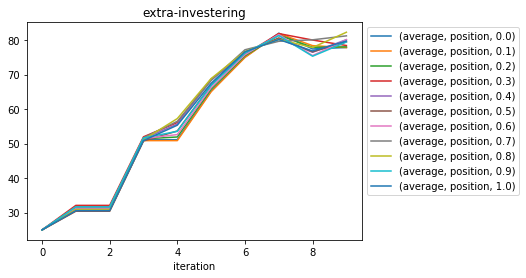

In [231]:
fig, ax = plt.subplots()
selection.plot(title=dropdown.value, ax=ax)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))